In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [92]:
df = pd.read_csv('Fraud.csv')
df = pd.DataFrame(df)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [93]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<AxesSubplot:xlabel='isFraud', ylabel='count'>

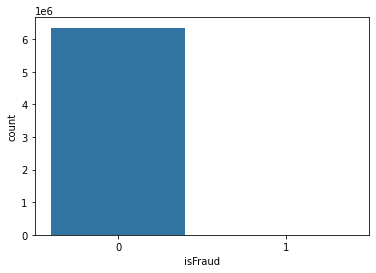

In [95]:
sns.countplot(x ='isFraud', data = df)

In [96]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [97]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [98]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [99]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [100]:
df.isFlaggedFraud.unique()

array([0, 1], dtype=int64)

In [101]:
# describing the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [102]:
# checking the correlation between the variables with the target variable
df.corr()["isFraud"].sort_values()

newbalanceOrig   -0.008148
oldbalanceDest   -0.005885
newbalanceDest    0.000535
oldbalanceOrg     0.010154
step              0.031578
isFlaggedFraud    0.044109
amount            0.076688
isFraud           1.000000
Name: isFraud, dtype: float64

<AxesSubplot:>

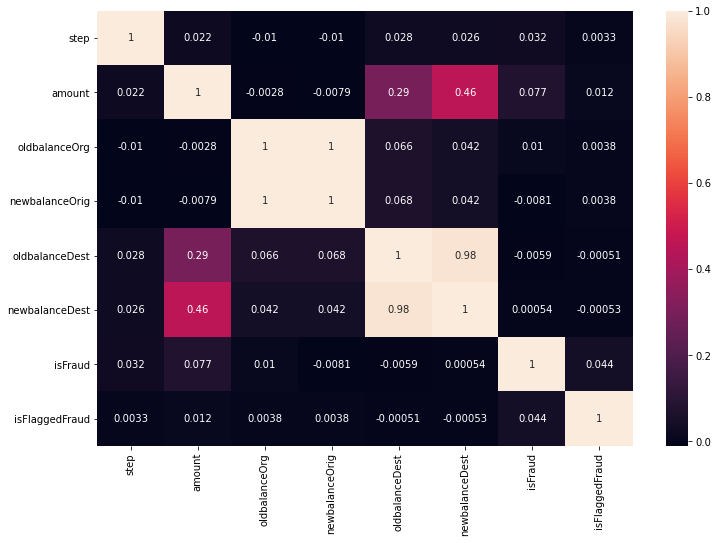

In [103]:
# heatmap of the correlation between the variables with the target variable
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [104]:
df["isFraud"].value_counts()
# as we see here we have an unbalanced dataset

0    6354407
1       8213
Name: isFraud, dtype: int64

In [105]:
df["isFraud"].value_counts(normalize=True)
# more than 90 % of the data is not frau

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

In [106]:
# checking the payment type of the transactions
df["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

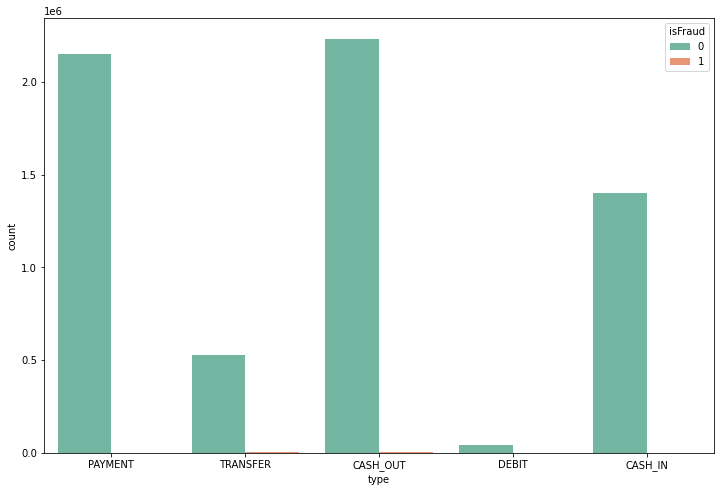

In [107]:
# counting the number of transactions per type
plt.figure(figsize=(12,8))
sns.countplot(x="type", data=df,hue="isFraud" , palette="Set2")
# we are enable to analyse the Fraud transactions 
# as we have non fraud transactions more than fraud transactions

In [108]:
# dropping the variables that are not needed
# making a copy of the data
df_copy = df.copy()
df_copy.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [109]:
# checking the step variable
# About the step : maps a unit of time in the real world
# In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
df["step"].value_counts().sort_values(ascending=False).head()

19     51352
18     49579
187    49083
235    47491
307    46968
Name: step, dtype: int64

In [110]:
# columns with object type
df_copy.select_dtypes(include=["object"]).columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [111]:
# droping NameOrig and NameDest
df_copy.drop(["nameOrig", "nameDest"], axis=1, inplace=True)

In [112]:
df_copy.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [113]:
# Label Encoding the type variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy["type"] = le.fit_transform(df_copy["type"])

In [114]:
df_copy.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [115]:
# dropping the isFlaggedFraud variable as we dont need it
df_copy.drop(["isFlaggedFraud"], axis=1, inplace=True)

In [116]:
df_copy.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [117]:
# choosing a model to use
# First we need to create a training and test set
from sklearn.model_selection import train_test_split
X = df_copy.drop("isFraud",axis=1).values
y = df_copy["isFraud"].values
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = False)
X_val, X_test, y_val, y_test = train_test_split(X_loc_test, y_loc_test, test_size = 0.2, random_state = 42, shuffle = False)

In [118]:
# we need to feature scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [119]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [120]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [121]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [122]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

42453.40960974162

In [123]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[0.007582975944345753],[0.17735201771839915],

In [124]:
from sklearn.linear_model import LogisticRegression
Algorithm.append('LogisticRegression')
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [125]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [126]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

0.5347029432196058

In [127]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'LogisticRegression'],[0.007582975944345753, 0.006035244887133848],[0.17735201771839915, 0.34525942513663477],

In [128]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegression')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [129]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [130]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

0.043042045513523794

In [131]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'LogisticRegression', 'DecisionTreeRegression'],[0.007582975944345753, 0.006035244887133848, 0.0015559615724641952],[0.17735201771839915, 0.34525942513663477, 0.8311996955430386],

In [132]:
d = {'Algorithm':Algorithm, 'MSE_Score':MSE_Score, 'R2_Score':R2_Score}
comp = pd.DataFrame(data = d)
comp

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,0.007583,0.177352
1,LogisticRegression,0.006035,0.345259
2,DecisionTreeRegression,0.001556,0.831200


In [133]:
from sklearn.ensemble import BaggingRegressor
clf= BaggingRegressor(random_state=42)
clf.fit(X_train,y_train)

BaggingRegressor(random_state=42)

In [134]:
clf.score(X_train,y_train)

0.9661722242491282

In [135]:
clf.score(X_test,y_test)

0.8690731981970816